In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA25\ML\Logistic Reg")

In [3]:
os.listdir()

['act_pred_train.xlsx',
 'cust_new.csv',
 'Data.csv',
 'Data.zip',
 'LogReg_Default.ipynb',
 'LogReg_Defaultv01.ipynb',
 'merge_from_ofoct.jpg',
 'prob.csv',
 'train.csv']

In [4]:
df=pd.read_csv("Data.csv")

In [5]:
df.head(3)

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0


In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True) 
# As this column was unwanted(monotonic increasing variable)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 49.3 KB


***
* age : Age in years
* ed : Education category (1,2,3,4,5)
* employ : Experiance ( in years)
* addres : No of years in current address 
* income : yearly income($)
* debtinc : debt to income ratio
* creddebt :Credit debt
* othdebt : Other debt
* default : person has defaulted (yes -1, no-0)( Target Variable)
*** 

### EDA 

### Unvivariate Analysis 

In [8]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)

In [9]:
univariate_cat(data=df, x="ed")

Total missing values : 0

Total count of unique categories: 5

Unique categories :
[3.0, 1.0, 2.0, 4.0, 5.0]
Value count and %
      Count percentage
1.0    372     53.14%
2.0    198     28.29%
3.0     87     12.43%
4.0     38      5.43%
5.0      5      0.71%


In [10]:
univariate_cat(data=df, x="default")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[1.0, 0.0]
Value count and %
      Count percentage
0.0    517     73.86%
1.0    183     26.14%


* *If one event has less numbers than another event is called Imbalance class Problem*

In [11]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [12]:
df.columns 

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

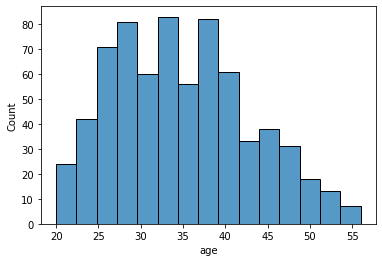

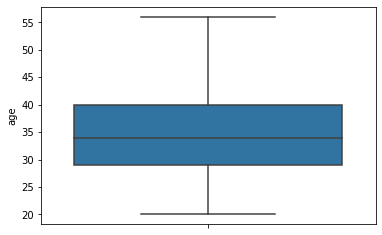

{'missing': 0,
 'min': 20.0,
 'max': 56.0,
 'mean': 34.86,
 'var': 63.96,
 'std': 8.0,
 'range': 36.0,
 'q1': 29.0,
 'q2': 34.0,
 'q3': 40.0,
 'skewness': 0.36,
 'kurtosis': -0.61}

In [13]:
univariate_num(data=df, x="age")

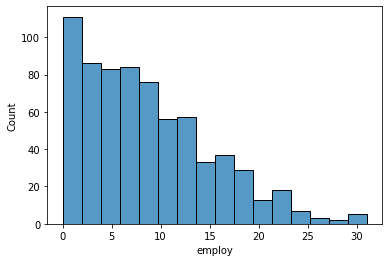

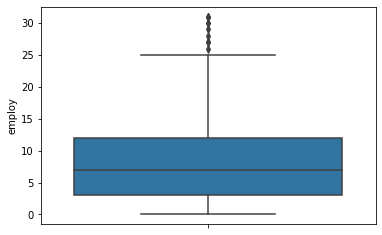

{'missing': 0,
 'min': 0.0,
 'max': 31.0,
 'mean': 8.39,
 'var': 44.33,
 'std': 6.66,
 'range': 31.0,
 'q1': 3.0,
 'q2': 7.0,
 'q3': 12.0,
 'skewness': 0.83,
 'kurtosis': 0.23}

In [14]:
univariate_num(data=df, x="employ")

### Bivariate Analysis 

In [15]:
# cat-cat 
# cat-num
# num-num

In [16]:
pd.crosstab(df["ed"], df["default"])

default,0.0,1.0
ed,,
1.0,293,79
2.0,139,59
3.0,57,30
4.0,24,14
5.0,4,1


In [17]:
pd.crosstab(df["ed"], df["default"], normalize="columns")

default,0.0,1.0
ed,,
1.0,0.566731,0.431694
2.0,0.268859,0.322404
3.0,0.110251,0.163934
4.0,0.046422,0.076503
5.0,0.007737,0.005464


In [18]:
pd.crosstab(df["ed"], df["default"], normalize="index")

default,0.0,1.0
ed,,
1.0,0.787634,0.212366
2.0,0.702020,0.297980
3.0,0.655172,0.344828
4.0,0.631579,0.368421
5.0,0.800000,0.200000


In [19]:
pd.crosstab(df["ed"], df["default"], normalize="all")

default,0.0,1.0
ed,,
1.0,0.418571,0.112857
2.0,0.198571,0.084286
3.0,0.081429,0.042857
4.0,0.034286,0.020000
5.0,0.005714,0.001429


In [20]:
len(df["default"])

700

In [21]:
# Cat - num

In [22]:
df.groupby(["default"]).agg({"age":["min", "max", "mean", "var"]})

age                            
          min   max       mean        var
default                                  
0.0      20.0  56.0  35.514507  59.409188
1.0      20.0  55.0  33.010929  72.549330

<AxesSubplot:xlabel='default'>

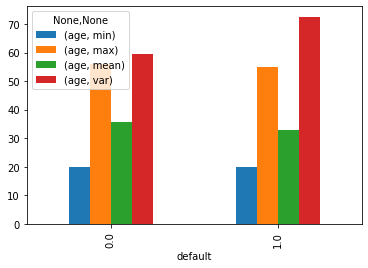

In [23]:
df.groupby(["default"]).agg({"age":["min", "max", "mean", "var"]}).plot(kind="bar")

In [24]:
df.groupby(["default"]).agg({"employ":["min", "max", "mean", "var"]})

employ                           
           min   max      mean        var
default                                  
0.0        0.0  31.0  9.508704  44.405447
1.0        0.0  31.0  5.224044  30.724254

<AxesSubplot:xlabel='default'>

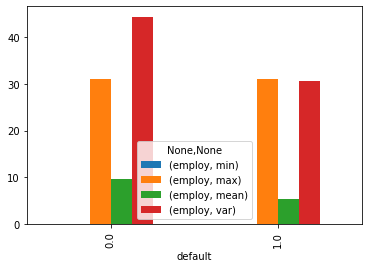

In [25]:
df.groupby(["default"]).agg({"employ":["min", "max", "mean", "var"]}).plot(kind="bar")

In [26]:
# Num - num

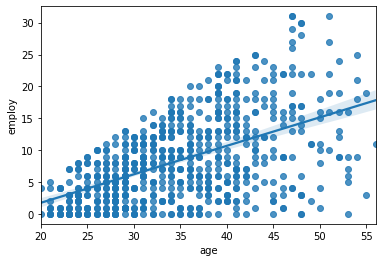

In [27]:
sns.regplot(data=df, y=df["employ"], x=df["age"])
plt.show()

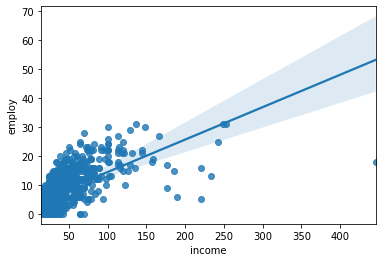

In [28]:
sns.regplot(data=df, y=df["employ"], x=df["income"])
plt.show()

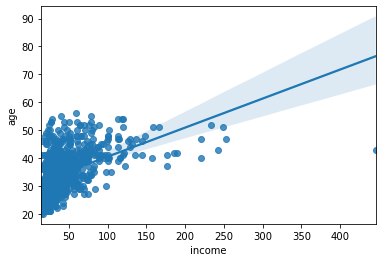

In [29]:
sns.regplot(data=df, y=df["age"], x=df["income"])
plt.show()

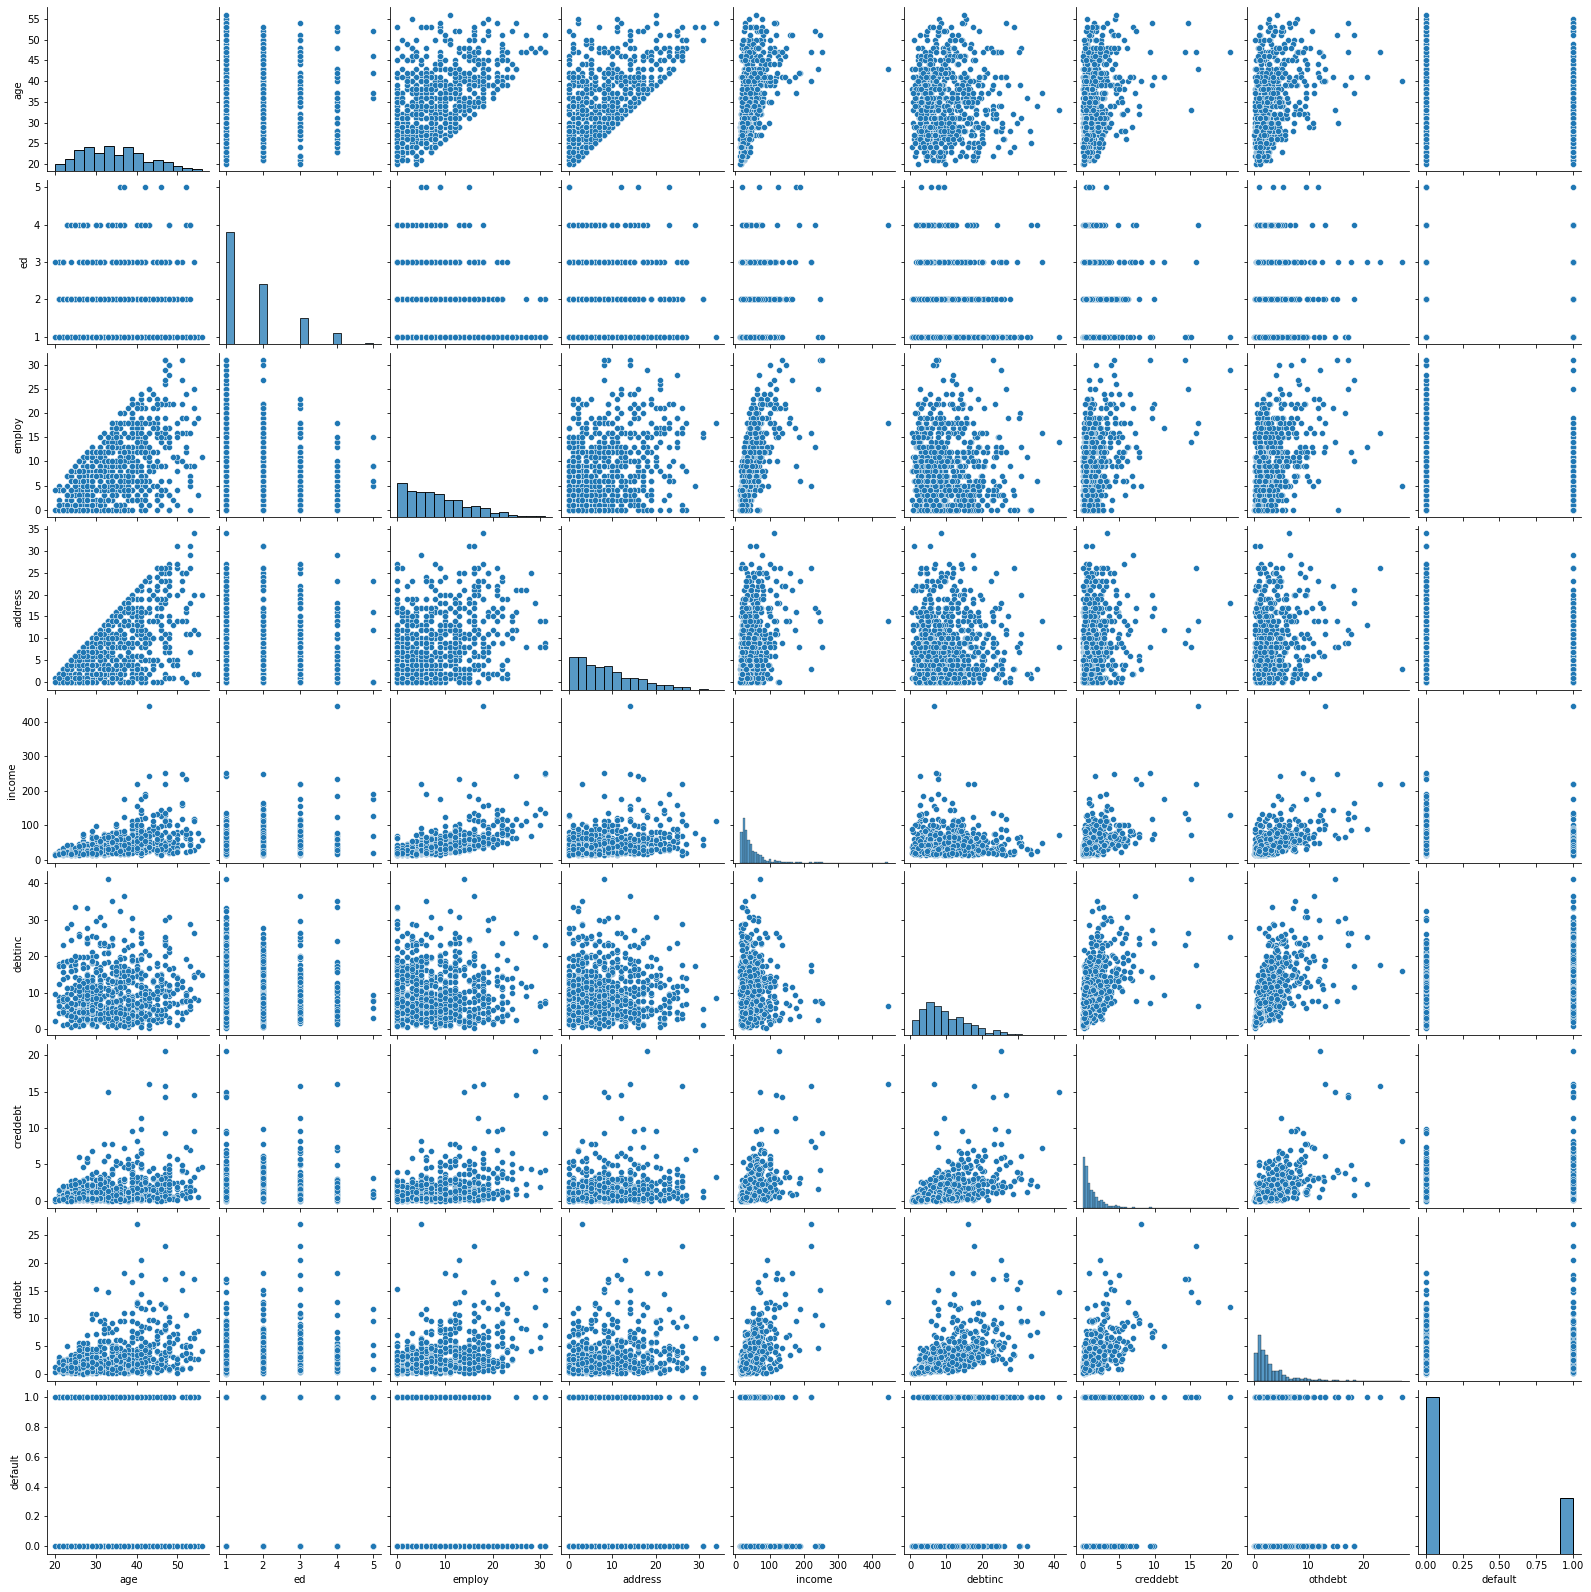

In [30]:
sns.pairplot(df)
plt.show()

### Missing Value Treatment

In [31]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

### Outlier treatment

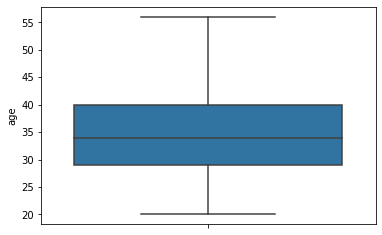

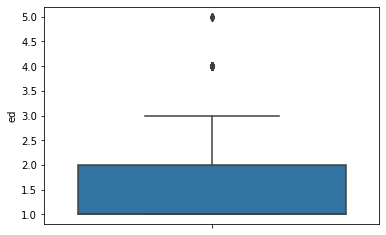

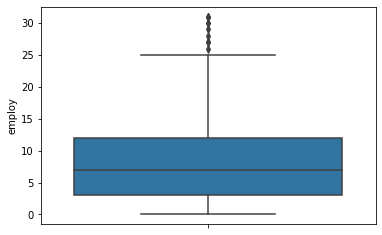

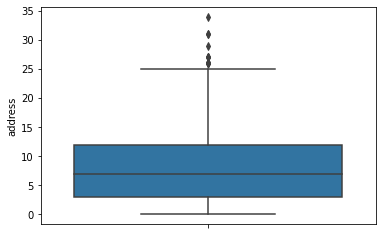

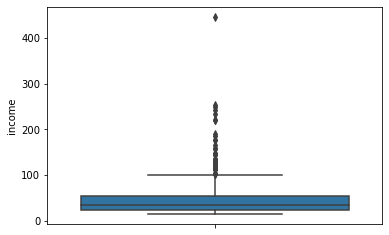

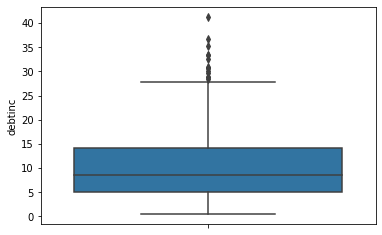

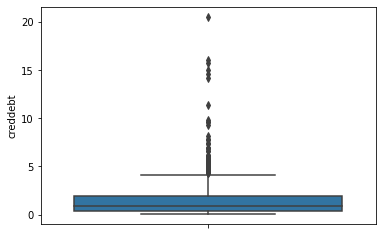

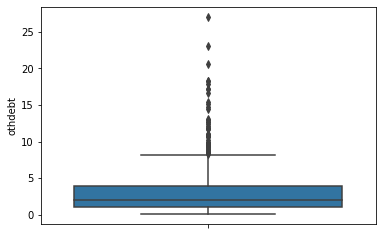

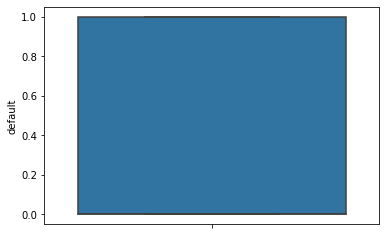

In [32]:
for i in df.columns:
    sns.boxplot(data=df, y=i)
    plt.show()

In [33]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,700.0,34.860000,7.997342,20.000000,21.000000,22.000000,22.000000,23.000000,23.000000,25.000000,29.000000,34.000000,40.000000,46.000000,49.000000,50.000000,51.000000,52.000000,53.010000,56.00000
ed,700.0,1.722857,0.928206,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000
employ,700.0,8.388571,6.658039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,18.000000,21.050000,22.000000,23.000000,24.000000,27.010000,31.00000
address,700.0,8.278571,6.824877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,18.000000,22.000000,23.000000,24.030000,25.020000,26.010000,34.00000
income,700.0,45.601429,36.814226,14.000000,15.000000,15.980000,16.000000,16.000000,17.000000,19.000000,24.000000,34.000000,55.000000,82.000000,113.000000,118.080000,129.000000,148.180000,190.300000,446.00000
debtinc,700.0,10.260571,6.827234,0.400000,0.900000,1.200000,1.600000,1.700000,1.900000,2.900000,5.000000,8.600000,14.125000,19.610000,23.800000,24.716000,25.709000,27.716000,30.701000,41.30000
creddebt,700.0,1.553553,2.117197,0.011696,0.030209,0.052661,0.072870,0.089062,0.107029,0.170020,0.369059,0.854869,1.901955,3.621504,5.098264,5.579937,6.236958,7.394810,9.891428,20.56131
othdebt,700.0,3.058209,3.287555,0.045584,0.160936,0.196423,0.259929,0.342751,0.376727,0.562232,1.044178,1.987567,3.923065,7.036180,9.501648,10.201442,11.728490,12.960384,17.184744,27.03360
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [34]:
def outliers_perc(x):
    x=x.clip(upper=x.quantile(.99))
    return x

In [35]:
var=["address", "income", "debtinc", "creddebt", "othdebt"]
df_out=df[var]
df_out.head(2)

,address,income,debtinc,creddebt,othdebt
0,12.0,176.0,9.3,11.359392,5.008608
1,6.0,31.0,17.3,1.362202,4.000798


In [36]:
df_no_out=df.drop(columns=var)
df_no_out.head(2)

,age,ed,employ,default
0,41.0,3.0,17.0,1.0
1,27.0,1.0,10.0,0.0


In [37]:
df_out=df_out.apply(lambda x: outliers_perc(x))

In [38]:
df_combined=pd.concat([df_no_out,df_out], axis=1)
# df_combined.head(2)

## Mulicollinearity 

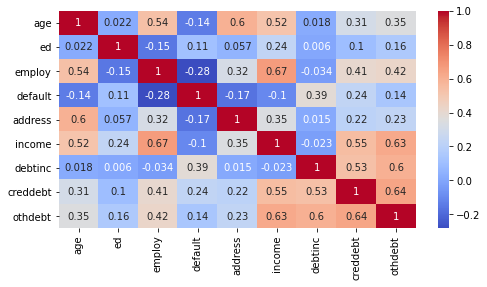

In [39]:
plt.figure(figsize=(8,4))
cr=df_combined.corr()
# cr=cr[abs(cr)>.6] 
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

In [40]:
df_combined

,age,ed,employ,default,address,income,debtinc,creddebt,othdebt
0,41.0,3.0,17.0,1.0,12.0,176.0,9.3,9.891428,5.008608
1,27.0,1.0,10.0,0.0,6.0,31.0,17.3,1.362202,4.000798
2,40.0,1.0,15.0,0.0,14.0,55.0,5.5,0.856075,2.168925
3,41.0,1.0,15.0,0.0,14.0,120.0,2.9,2.658720,0.821280
4,24.0,2.0,2.0,1.0,0.0,28.0,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,1.0,15.0,27.0,4.6,0.262062,0.979938
696,29.0,2.0,6.0,0.0,4.0,21.0,11.5,0.369495,2.045505
697,33.0,1.0,15.0,0.0,3.0,32.0,7.6,0.491264,1.940736
698,45.0,1.0,19.0,0.0,22.0,77.0,8.4,2.302608,4.165392


### Model Development 

In [41]:
y=df_combined["default"]
x=df_combined.drop(columns=["default"])

In [42]:
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=.25,
                                                 random_state=0)

In [43]:
logR=LogisticRegression()
logR.fit(x_train, y_train)

LogisticRegression()

In [44]:
# In Classification score means : Accuracy 

In [45]:
print("Train Score:",logR.score(x_train, y_train))
print("Test Score:",logR.score(x_test, y_test))

Train Score: 0.8152380952380952
Test Score: 0.7885714285714286


In [46]:
pred_train=logR.predict(x_train)

In [47]:
pred_train

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [48]:
act_pred_train=pd.DataFrame({"Act" :y_train, "Pred":pred_train})
act_pred_train.to_excel("act_pred_train.xlsx")

In [49]:
os.getcwd()

'D:\\Training\\Imarticus\\PGA\\PGA25\\ML\\Logistic Reg'

### Model Evaluation 

#### Confusion Matrix

In [50]:
conf_train=metrics.confusion_matrix(y_train, pred_train)
conf_train

array([[353,  33],
       [ 64,  75]], dtype=int64)

In [51]:
pd.DataFrame(conf_train, columns=["Pred_0_neg", "Pred_1_pos"], 
             index=["Act_0_neg", "Act_1_pos"])

,Pred_0_neg,Pred_1_pos
Act_0_neg,353,33
Act_1_pos,64,75


In [52]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       386
         1.0       0.69      0.54      0.61       139

    accuracy                           0.82       525
   macro avg       0.77      0.73      0.74       525
weighted avg       0.81      0.82      0.81       525



In [53]:
# weighted  avg: n1*x1+n2*x2/ (n1+n2)
round((.88*386+.61*139)/(386+139),2)

0.81

In [54]:
prob_train=pd.DataFrame(logR.predict_proba(x_train), columns=["prob_0", "Prob_1"])

In [55]:
new_pred_train=np.where(prob_train["Prob_1"]>.35,1,0)
print(metrics.classification_report(y_train, new_pred_train))

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       386
         1.0       0.61      0.72      0.66       139

    accuracy                           0.80       525
   macro avg       0.75      0.78      0.76       525
weighted avg       0.82      0.80      0.81       525



In [56]:
new_conf_train=metrics.confusion_matrix(y_train, new_pred_train)
pd.DataFrame(new_conf_train, columns=["Pred_0_neg", "Pred_1_pos"], 
             index=["Act_0_neg", "Act_1_pos"])

,Pred_0_neg,Pred_1_pos
Act_0_neg,321,65
Act_1_pos,39,100


Decile Analysis
KS Value
Lift and lift chart
Gain chart
lorentz curve and gini index

In [57]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [58]:
profile_decile(x_train, y_train, logR)

,min_score,max_score,Event,Non_event,Total
Decile,,,,,
1,0.666311,0.996660,43.0,10.0,53.0
2,0.509707,0.665976,29.0,23.0,52.0
3,0.364534,0.504855,24.0,29.0,53.0
4,0.258252,0.363214,15.0,37.0,52.0
5,0.179162,0.255318,13.0,39.0,52.0
6,0.118171,0.178885,3.0,50.0,53.0
7,0.069913,0.116411,7.0,45.0,52.0
8,0.033613,0.068625,3.0,50.0,53.0
9,0.010359,0.033581,2.0,50.0,52.0


In [61]:
profile_decile(x_test, y_test, logR) 

,min_score,max_score,Event,Non_event,Total
Decile,,,,,
1,0.592205,0.961206,13.0,5.0,18.0
2,0.464821,0.588010,7.0,10.0,17.0
3,0.353804,0.462658,7.0,11.0,18.0
4,0.268252,0.352710,8.0,9.0,17.0
5,0.200202,0.262911,5.0,12.0,17.0
6,0.135075,0.196082,1.0,17.0,18.0
7,0.085432,0.133799,2.0,15.0,17.0
8,0.034531,0.085082,0.0,18.0,18.0
9,0.010080,0.032901,1.0,16.0,17.0


#### ROC and AUC 

In [62]:
# ROC : Receiver Operator Characteristics Curve
# It is the curve between tpr(True positive Rate) and fpr (False Positive Rate)
# AUC : Area under the curve 

In [64]:
fpr, tpr, thresholds=metrics.roc_curve(y_train, pred_train)
roc_auc=metrics.auc(fpr, tpr)  # AUC : Area under the curve 
roc_auc 

0.7270380586722331

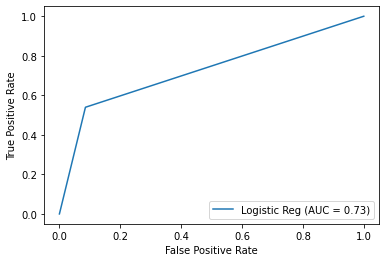

In [65]:
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                estimator_name='Logistic Reg')
display.plot()
plt.show()

In [ ]:
# score (Accuracy), confusion_matrix, recall, Precision , F1 score, decile , Ks , Lift, lorentz(Gain chart), Lift chart, ROC, AUC